### SEGMENTATION OF CUSTOMER-LOYALTY DATASET USING RFM SCORING 

##   I) Analysing the dataset to see what we have

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.cluster import KMeans
import numpy as np

In [3]:
data= pd.read_csv("data/scoring_dataset.csv",sep=";")
print('La dimension de la Dataframe est.....-> {}\n'.format(data.shape))

print('Nuber of customer used in this projetc.....-> {}\n'.format(len(data)))
data.columns

La dimension de la Dataframe est.....-> (3280, 11)

Nuber of customer used in this projetc.....-> 3280



Index(['TIERS', 'DATECREATION', 'LIBELLE_CODE_STAT2', 'SOMMEUTILISEE',
       'NbrConommable', 'NbrDevices', 'Parrain', 'DERNIEREDATEACHAT',
       'DERNIEREDATEBL', 'annee_BL', 'duree_de_vie'],
      dtype='object')

In [4]:
len(data)

3280

In [5]:
print('#############',data.shape,'###################')
print(data.describe())


############# (3280, 11) ###################
       SOMMEUTILISEE  NbrConommable   NbrDevices      Parrain     annee_BL  \
count   3.280000e+03    3280.000000  3280.000000  3280.000000  3243.000000   
mean    5.898542e+03      12.185264     1.840244     0.022561  2020.525439   
std     4.830707e+04      84.121017     9.008726     0.154559     0.938032   
min    -7.584000e+01       0.000000     0.000000     0.000000  2017.000000   
25%     2.470835e+03       4.000000     1.000000     0.000000  2020.000000   
50%     3.033320e+03       6.000000     1.000000     0.000000  2021.000000   
75%     4.041425e+03      10.000000     1.000000     0.000000  2021.000000   
max     2.465086e+06    4266.000000   374.000000     2.000000  2021.000000   

       duree_de_vie  
count   3243.000000  
mean       0.734505  
std        0.957520  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        4.000000  


In [6]:
#verification of NA values existance
NaValues = data[pd.isnull(data).any(axis=1)]
NaValues.shape

(37, 11)

In [7]:
#NaValues.to_csv('data/NaValues.csv',sep =';')

In [8]:
data.isnull().sum()

TIERS                  0
DATECREATION           0
LIBELLE_CODE_STAT2     0
SOMMEUTILISEE          0
NbrConommable          0
NbrDevices             0
Parrain                0
DERNIEREDATEACHAT      0
DERNIEREDATEBL        37
annee_BL              37
duree_de_vie          37
dtype: int64

In [9]:
#delating NA values
data.dropna(inplace=True)
data.isnull().sum()

TIERS                 0
DATECREATION          0
LIBELLE_CODE_STAT2    0
SOMMEUTILISEE         0
NbrConommable         0
NbrDevices            0
Parrain               0
DERNIEREDATEACHAT     0
DERNIEREDATEBL        0
annee_BL              0
duree_de_vie          0
dtype: int64

In [10]:
#verification of NA values existance
NullConso = data[(data["SOMMEUTILISEE"] < 0)|(data["NbrConommable"]==0)]
NullConso.shape
#NullConso.to_csv('data/nulleConso.csv',sep =';')

(27, 11)

###### we'll keep non negative amount  and no null NbrDevices and NbrConommable in the dataset
###### NO DEVICVE NO CONSUMABLE NO MONEY

In [11]:

data = data[(data["SOMMEUTILISEE"] > 0)&(data["NbrConommable"]!=0)]
data = data[data["NbrDevices"]!=0]
print('#############',data.shape,'###################')
print(data.describe())

############# (3182, 11) ###################
       SOMMEUTILISEE  NbrConommable   NbrDevices      Parrain     annee_BL  \
count   3.182000e+03    3182.000000  3182.000000  3182.000000  3182.000000   
mean    6.005283e+03      12.439242     1.878693     0.023256  2020.548712   
std     4.902135e+04      85.379692     9.141267     0.156870     0.914439   
min     4.939600e+02       1.000000     1.000000     0.000000  2017.000000   
25%     2.512015e+03       4.000000     1.000000     0.000000  2020.000000   
50%     3.052390e+03       6.000000     1.000000     0.000000  2021.000000   
75%     4.094530e+03      10.000000     1.000000     0.000000  2021.000000   
max     2.465086e+06    4266.000000   374.000000     2.000000  2021.000000   

       duree_de_vie  
count   3182.000000  
mean       0.744500  
std        0.958635  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        4.000000  


In [12]:
data['DATECREATION'] = pd.to_datetime(data['DATECREATION'])
data['anneeCreation'] = data['DATECREATION'].dt.year
df = data[data['anneeCreation']==2021]
df.shape
#df.to_csv('data/client2021.csv',sep=';')

(1122, 12)

In [13]:
##### we'll take off customer wich are created in 2021
data = data[data['anneeCreation']!=2021]
data.shape

(2060, 12)

##### "Durée-de_vie" expressed the recence of customers' commande.
if equal to zero, customers last command was at 2021

<AxesSubplot:title={'center':" customer's lifetime "}, ylabel='duree_de_vie'>

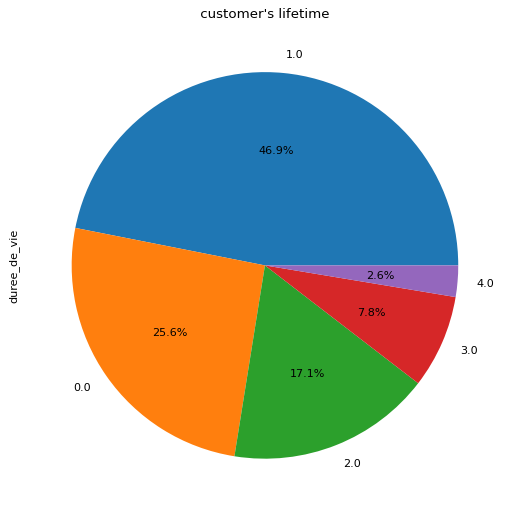

In [14]:
#Durée de vie des clients
plt.figure(figsize=(8,8), dpi=80)
data['duree_de_vie'].value_counts().plot.pie(autopct="%.1f%%", title = " customer's lifetime ")


## II) Calculating RFM metrics

## RECENCY

In [15]:
data['RECENCYy'] = data['annee_BL'] 
data['RECENCYy'].value_counts()
data.shape

(2060, 13)

##### "Durée-de_vie" expressed the recence of customers' commande.
if equal to zero, customers last command was at 2021, this current year. 
Later, we need to divide by "Durée-de_vie" to get quantities in  1 year and not in 3. 
So we are going to add 1 in order to get "Durée-de_vie" from 1 to 5

In [ ]:
def RECENCE(x):
    return x+1

In [ ]:
data['RECENCY']= data['duree_de_vie']
data['RECENCY']=data['RECENCY'].apply(RECENCE)
data.RECENCY.describe()

In [ ]:
plot = data['RECENCY'].value_counts().plot.pie(autopct="%.1f%%", title = " customer's Recency ",figsize=(5, 5))

## FREQUENCY

#####  For NbrDevices = 1, number of consommable for 3 years must be 18, so for 1 year,number of consumable = 6
#####  For NbrDevices = N and for 1 years, number of consommable = 6*N 
### If the customer has odered consumable = NbrConsumable, devices = NbrDevices 
#####  We can calculate his order's average and for 1 device and during his cycle's life
#####  Finally, The frequency of ordering of the customer will be   Frequency = number of consumable/NbrDevices/Age



In [ ]:
data['FREQUENCY'] = data['NbrConommable']/(data['NbrDevices'])
data['FREQUENCY'] = data['FREQUENCY']/data['RECENCY']
data['FREQUENCY'] = data['FREQUENCY'].round(0)
data.info()

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (10, 10)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.title("Customer's Recency")
        plt.show()
      

cat_summary(data, "FREQUENCY", plot=True)

In [ ]:
#data[data['FREQUENCY']<9].describe()

## MONETARY

In [22]:
data['MONETARY'] = data['SOMMEUTILISEE']/data['NbrDevices']
data['MONETARY'] = data['SOMMEUTILISEE']/data['RECENCY']
data.MONETARY.describe()

count      2060.000000
mean       3049.100203
std       15721.786234
min         164.653333
25%        1365.567500
50%        1784.533333
75%        2441.092500
max      616271.570000
Name: MONETARY, dtype: float64

In [23]:
RFM = data.filter(items=['TIERS','RECENCYy','FREQUENCY','MONETARY'])
print('#############',RFM.shape,'###################')
RFM.head()

############# (2060, 4) ###################


,TIERS,RECENCYy,FREQUENCY,MONETARY
0,C0000007,2020.0,6.0,2752.220
1,C0000011,2021.0,2.0,31621.472
2,C0000013,2021.0,1.0,3320.692
3,C0000015,2021.0,3.0,4520.104
4,C0000016,2021.0,2.0,7689.248


In [24]:
RFM.describe()

,RECENCYy,FREQUENCY,MONETARY
count,2060.000000,2060.000000,2060.000000
mean,2020.302913,3.684466,3049.100203
std,1.058508,1.874253,15721.786234
min,2017.000000,0.000000,164.653333
25%,2020.000000,2.000000,1365.567500
50%,2021.000000,4.000000,1784.533333
75%,2021.000000,5.000000,2441.092500
max,2021.000000,22.000000,616271.570000


# III)  CALCULATING RFM SCORES

## SEGMENTATION OF METRICS

### RECENCY SCORE

In [25]:
x = RFM['RECENCYy']
BIN =[0,2017,2018,2019,2020,2021]
RFM['RecencyScore'] = pd.cut(x,BIN, labels=[-2,-1,0,4,5])
RFM.head()

,TIERS,RECENCYy,FREQUENCY,MONETARY,RecencyScore
0,C0000007,2020.0,6.0,2752.220,4
1,C0000011,2021.0,2.0,31621.472,5
2,C0000013,2021.0,1.0,3320.692,5
3,C0000015,2021.0,3.0,4520.104,5
4,C0000016,2021.0,2.0,7689.248,5


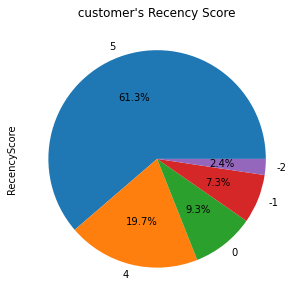

In [26]:
plot = RFM['RecencyScore'].value_counts().plot.pie(autopct="%.1f%%", title = " customer's Recency Score ",figsize=(5, 5))

### FREQUENCY SCORE

In [27]:
RFM.FREQUENCY.value_counts(dropna=False)

4.0     554
2.0     481
3.0     387
6.0     237
5.0     214
1.0     114
7.0      29
8.0      14
12.0      7
9.0       6
10.0      5
0.0       4
15.0      2
20.0      2
18.0      1
21.0      1
11.0      1
22.0      1
Name: FREQUENCY, dtype: int64

In [28]:
RFM['FREQUENCY']= RFM['FREQUENCY'].round()
y = RFM['FREQUENCY']
y_max = y.max()
y_max

22.0

In [29]:
RFM['FrequencyScore'] = pd.cut(y,[0,2,3,4,5,y_max+1],right=False, labels=[1,2,3,4,5])
RFM.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2125
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   TIERS           2060 non-null   object  
 1   RECENCYy        2060 non-null   float64 
 2   FREQUENCY       2060 non-null   float64 
 3   MONETARY        2060 non-null   float64 
 4   RecencyScore    2060 non-null   category
 5   FrequencyScore  2060 non-null   category
dtypes: category(2), float64(3), object(1)
memory usage: 149.4+ KB


In [30]:
RFM['FrequencyScore'].isnull().value_counts()

False    2060
Name: FrequencyScore, dtype: int64

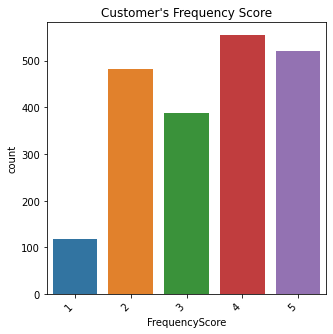

In [31]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (5, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.title("Customer's Frequency Score")
        plt.show()
      

cat_summary(RFM, "FrequencyScore", plot=True)

In [32]:
# RFM.FrequencyScore.value_counts().plot.pie(autopct="%.1f%%")

### MONETARY SCORE

In [33]:
z = RFM['MONETARY']
z_max = z.max()

In [34]:
z.describe()

count      2060.000000
mean       3049.100203
std       15721.786234
min         164.653333
25%        1365.567500
50%        1784.533333
75%        2441.092500
max      616271.570000
Name: MONETARY, dtype: float64

In [35]:
Bin =  [0,np.quantile(z, .25), np.quantile(z, .50), np.quantile(z, .75), np.quantile(z, 0.85),z_max]
Bin

[0, 1365.5675, 1784.5333333333333, 2441.0925, 3007.456, 616271.5700000001]

In [36]:
RFM['MonetaryScore'] = pd.cut(z,Bin, labels=[1,2,3,4,5])
RFM.MonetaryScore.describe()

count     2060
unique       5
top          1
freq       515
Name: MonetaryScore, dtype: int64

<AxesSubplot:ylabel='MonetaryScore'>

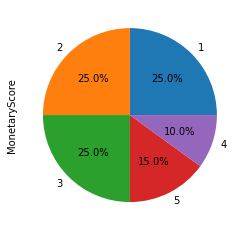

In [37]:
RFM.MonetaryScore.value_counts().plot.pie(autopct="%.1f%%")

In [38]:
RFM["RFM_GROUP"] = RFM["RecencyScore"].astype(str) +RFM["FrequencyScore"].astype(str)+ RFM["MonetaryScore"].astype(str)

In [39]:
RFM.RFM_GROUP.value_counts(dropna=False)

542     173
553     157
521     140
531      88
543      84
       ... 
-252      1
-111      1
-124      1
-131      1
012       1
Name: RFM_GROUP, Length: 105, dtype: int64

In [40]:
RFM['RFM_SCORE'] = RFM[['RecencyScore','FrequencyScore', 'MonetaryScore']].sum(axis=1)
RFM.isnull().sum()

TIERS             0
RECENCYy          0
FREQUENCY         0
MONETARY          0
RecencyScore      0
FrequencyScore    0
MonetaryScore     0
RFM_GROUP         0
RFM_SCORE         0
dtype: int64

In [41]:
loyalty_level = ['Lost','To_relance','Medium','Good','Excellent']
BIN = [0,4,7,10,14,16]

In [42]:
Score_cuts = pd.cut(RFM.RFM_SCORE,BIN,labels=loyalty_level)

In [43]:
RFM['loyalty_level'] = Score_cuts.values

<AxesSubplot:title={'center':'Loyalty Level'}, ylabel='loyalty_level'>

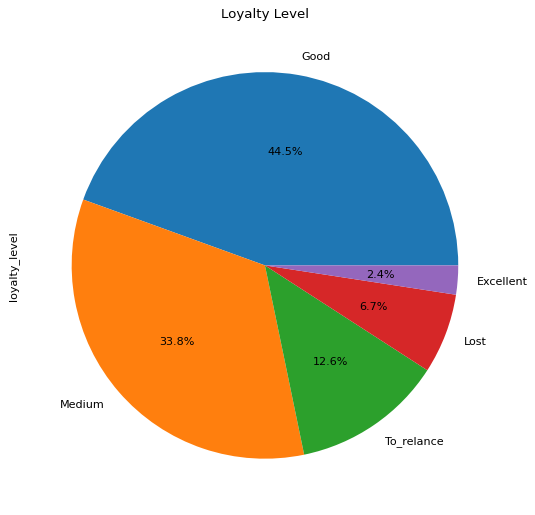

In [44]:
plt.figure(figsize=(8,8), dpi=80)
RFM['loyalty_level'].value_counts(dropna=False).plot.pie(autopct="%.1f%%", title = "Loyalty Level")

In [45]:
# data['loyalty_level'] =  RFM['loyalty_level']
# data['RFM_GROUP'] =  RFM['RFM_GROUP']
# data['RFM_SCORE'] =  RFM['RFM_SCORE']
RFMseg = RFM[["TIERS","RecencyScore","FrequencyScore","MonetaryScore","RFM_GROUP","RFM_SCORE","loyalty_level"]]
RFMseg.isnull().sum()

TIERS             0
RecencyScore      0
FrequencyScore    0
MonetaryScore     0
RFM_GROUP         0
RFM_SCORE         0
loyalty_level     0
dtype: int64

In [46]:
DATAseg = data.filter(items=['TIERS','DATECREATION','LIBELLE_CODE_STAT2','annee_BL'])

In [57]:
Dataseg = pd.merge(RFMseg,DATAseg, how='left',on='TIERS')
dataSeg = Dataseg.sort_values('loyalty_level',ascending=False)
dataSeg

,TIERS,RecencyScore,FrequencyScore,MonetaryScore,RFM_GROUP,RFM_SCORE,loyalty_level,DATECREATION,LIBELLE_CODE_STAT2,annee_BL
1172,C0000843,5,5,5,555,15,Excellent,2020-04-29 09:20:08,Particulier,2021.0
1757,C0001287,5,5,5,555,15,Excellent,2020-07-01 17:58:55,Particulier,2021.0
671,C0000431,5,5,5,555,15,Excellent,2019-05-13 11:55:23,Particulier,2021.0
1044,C0000745,5,5,5,555,15,Excellent,2020-03-12 14:30:26,Particulier,2021.0
345,C0000254,5,5,5,555,15,Excellent,2018-06-27 11:12:08,Collectivité,2021.0
...,...,...,...,...,...,...,...,...,...,...
349,C1000718,0,3,1,031,4,Lost,2018-07-01 21:00:04,Particulier,2019.0
348,C1000706,-1,2,2,-122,3,Lost,2018-06-29 14:50:04,Particulier,2018.0
67,C0000076,-1,2,1,-121,2,Lost,2017-06-13 14:48:02,Pro. Tourisme,2018.0
127,C1000243,-2,2,2,-222,2,Lost,2017-07-31 16:20:07,Particulier,2017.0


In [58]:
client  = pd.read_csv('data/clients.csv')

In [59]:
client= client[['TIERS','NOMCLIENT','TELEPHONE','EMAIL']]

In [60]:
client['TIERS'] = client['TIERS'].str.strip()

In [61]:
client.head()

,TIERS,NOMCLIENT,TELEPHONE,EMAIL
0,C0000338,PANAMARINA,+50760058879,panamarina1@yahoo.com
1,C0000487,Saprochi SA,0041794473909,andrea.granelli@saprochi.ch
2,C0000702,BELLAGAMBI FRANCOISE,0661502267,p.bellagambi@qista.com
3,C0000556,APARICIO Vincent,0490383839,vincent.aparicio@orange.fr
4,C0000293,AEC,0608435887,aec11@wanadoo.fr


In [62]:
dataSeg = pd.merge(dataSeg,client, how='left', on='TIERS')

In [64]:
dataSeg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TIERS               2060 non-null   object        
 1   RecencyScore        2060 non-null   category      
 2   FrequencyScore      2060 non-null   category      
 3   MonetaryScore       2060 non-null   category      
 4   RFM_GROUP           2060 non-null   object        
 5   RFM_SCORE           2060 non-null   int64         
 6   loyalty_level       2060 non-null   category      
 7   DATECREATION        2060 non-null   datetime64[ns]
 8   LIBELLE_CODE_STAT2  2060 non-null   object        
 9   annee_BL            2060 non-null   float64       
 10  NOMCLIENT           2060 non-null   object        
 11  TELEPHONE           2051 non-null   object        
 12  EMAIL               2050 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(1), i

In [65]:
RFM[RFM["TIERS"]=="C0001327"]
# SegmentedData = data.filter(items=['TIERS','DATECREATION','LIBELLE_CODE_STAT2','annee_BL','loyalty_level','RFM_GROUP','RFM_SCORE'])

# SegmentedData = SegmentedData.sort_values('loyalty_level',ascending=True)
# SegmentedData

,TIERS,RECENCYy,FREQUENCY,MONETARY,RecencyScore,FrequencyScore,MonetaryScore,RFM_GROUP,RFM_SCORE,loyalty_level
1869,C0001327,2020.0,22.0,5477.18,4,5,5,455,14,Good


In [66]:
 #= data[data['loyalty_level']=='Excellent'].sort_values('RFM_SCORE',ascending=True)
# clientGood = data[data['loyalty_level']=='Good'].sort_values('RFM_SCORE',ascending=True)
# clientMedium = data[data['loyalty_level']=='Medium'].sort_values('RFM_SCORE',ascending=True)
# clientTo_relance = data[data['loyalty_level']=='To_relance'].sort_values('RFM_SCORE',ascending=True)

In [67]:
dataSeg.to_excel('data/SegmentedCustomer.xlsx',sheet_name='Loyalty_Segmentation')
# clientGood.to_csv('data/Good.csv',sep=';')
# clientMedium.to_csv('data/Medium.csv',sep=';')
# clientTo_relance.to_csv('data/To_relance.csv',sep=';')

In [ ]:
dataSeg.shape
